<a id='notebook-top'></a>
This notebook demonstrates the observations made by key instruments,e.g., SolO/EUI, Hinode/EIS, SolO/SPICE, and IRIS
during the DKIST-SolO cooridinated observation campaign in Oct. 2022. This campagin would not be possible without the 
support from both DKIST and Solar Orbiter teams, including using the director discretionary time of DKIST. Many thanks
 to K. Barczynski, T. Schad, M. Janiver, C. Nelson, A. Tritschler, D. Müller, and other DKIST, Solar Orbiter, IRIS, and 
 Hinode team members and planners to make it happen. A manuscript summaries the 2022 campaign is under preparation 
 (Barczynski et al. in prep).  

 This study focuses on upflow regions at active region boundaries, which is beyond the FOVs of DKIST/VBI and ViSP. Additionally,
 DKIST/Cryo-NIRSP data is still under processing. Therefore, we choose not to present DKIST data in this notebook. The timeline 
 and FOVs of the key observations analyzed in this study are presented in [Figure 1](#figure-1). 

Note: The internal hyperlink only works on [GitHub Pages](https://yjzhu-solar.github.io/EIS_DKIST_SolO/eis_eui_upflow_ipynb_html/fov_summary.html) or [nbviewer](https://nbviewer.org/github/yjzhu-solar/EIS_DKIST_SolO/blob/master/ipynb/ms_eis_eui_upflow/obs_summary.ipynb). Do not click when viewing the notebook on GitHub.)

In [82]:
import sunpy
import sunpy.map
import numpy as np
import pandas as pd
import sunpy.net.attrs as a
from sunpy.net import Fido
import sunpy_soar
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, AsinhStretch
from sunpy.coordinates import (propagate_with_solar_surface,
                                Helioprojective,
                                get_horizons_coord)
import requests
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from matplotlib import rc_context, rcParams
import matplotlib.patheffects as path_effects
import matplotlib.dates as mdates 
import matplotlib.patches as patches
from sunraster.instr.spice import read_spice_l2_fits
from scipy.spatial import ConvexHull
from sjireader import read_iris_sji
from itertools import chain

In [2]:
ms_style_dict = {'text.usetex': True, 'font.family': 'serif', 'axes.linewidth': 1.2,
                 'xtick.major.width': 1.2, 'xtick.major.size': 4,
                 'ytick.major.width': 1.2, 'ytick.major.size': 4,
                 'xtick.minor.width': 1.2, 'xtick.minor.size': 2,
                 'ytick.minor.width': 1.2, 'ytick.minor.size': 2,
                 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'text.latex.preamble': r'\usepackage[T1]{fontenc}'
                 r'\usepackage{amsmath}' r'\usepackage{siunitx}'
                 r'\sisetup{detect-all=True}'}
rcParams.update(ms_style_dict)

In [3]:
eis_list_file = "../../src/EIS/eis_obs_list.xlsx"

In [4]:
eis_list_df = pd.read_excel(eis_list_file, sheet_name="Sheet1")
eis_list_df = eis_list_df.replace({'stud_acr': {'HH_Flare+AR_180x152H': 'HH_Flare', 'HPW021VEL260x512v2': 'HPW021VEL'}})
eis_list_df

,obs_start,obs_end,texp,stud_acr,repeat,fovx,fovy,cdelt1,des
0,2022-10-19 18:26:00,2022-10-19 22:37:00,10,HH_Flare,48,180,152,6,"fast, sparse scan, minimal lines"
1,2022-10-20 03:44:00,2022-10-20 04:47:00,60,DHB_007_v2,1,248,512,4,"slow scan, long slit, large FOV, more lines"
2,2022-10-20 07:05:00,2022-10-20 11:05:00,10,HH_Flare,40,180,152,6,"fast, sparse scan, minimal lines"
3,2022-10-20 18:54:00,2022-10-20 20:03:00,10,HH_Flare,13,180,152,6,"fast, sparse scan, minimal lines"
4,2022-10-20 23:43:00,2022-10-21 02:12:00,60,DHB_007_v2,2,248,512,4,"slow scan, long slit, large FOV, more lines"
5,2022-10-21 03:15:00,2022-10-21 05:12:00,10,HH_Flare,22,180,152,6,"fast, sparse scan, minimal lines"
6,2022-10-21 06:12:00,2022-10-21 17:14:00,10,HH_Flare,124,180,152,6,"fast, sparse scan, minimal lines"
7,2022-10-21 18:14:00,2022-10-21 22:41:00,10,HH_Flare,50,180,152,6,"fast, sparse scan, minimal lines"
8,2022-10-22 06:30:00,2022-10-22 07:35:00,60,DHB_007_v2,1,248,512,4,"slow scan, long slit, large FOV, more lines"
9,2022-10-22 08:08:00,2022-10-22 10:43:00,10,HH_Flare,25,180,152,6,"fast, sparse scan, minimal lines"


In [5]:
def get_hri_list(date_begin='2022-10-18', date_end='2022-10-26'):
    instrument = a.Instrument("EUI")
    time = a.Time(date_begin, date_end)
    level = a.Level(2)
    product = a.soar.Product("eui-hrieuv174-image") | a.soar.Product("eui-hrieuvzer-image")

    result = Fido.search(instrument & time & level & product)
    

    hri_time_slots = []

    for result_ in result:
        time_start = Time(result_['Start time'])
        time_end = Time(result_['End time'])
        for ii in range(8):
            time_interval = Time((Time(date_begin) + ii*u.day, Time(date_begin) + (ii+1)*u.day))
            time_start_subset = time_start[(time_start > time_interval[0]) & (time_start < time_interval[1])]
            time_end_subset = time_end[(time_end > time_interval[0]) & (time_end < time_interval[1])]

            if len(time_start_subset) > 0:
                hri_time_slots.append(Time((np.min(time_start_subset), np.max(time_end_subset))))
            
    return result, hri_time_slots

In [6]:
hri_list, hri_time_slots = get_hri_list()

In [7]:
def get_fsi_list(date_begin='2022-10-18', date_end='2022-10-26'):
    instrument = a.Instrument("EUI")
    time = a.Time(date_begin, date_end)
    level = a.Level(2)
    product = a.soar.Product("eui-fsi174-image")

    result = Fido.search(instrument & time & level & product)
    
    return result

In [8]:
fsi_list = get_fsi_list()

In [9]:
def get_phi_list(date_begin='2022-10-18', date_end='2022-10-26'):
    instrument = a.Instrument("PHI")
    time = a.Time(date_begin, date_end)
    level = a.Level(2)
    product = a.soar.Product("phi-hrt-blos")

    result = Fido.search(instrument & time & level & product)
    
    return result

In [10]:
phi_list = get_phi_list()

In [11]:
def get_spice_list(date_begin='2022-10-18', date_end='2022-10-26'):
    instrument = a.Instrument("SPICE")
    time = a.Time(date_begin, date_end)
    level = a.Level(2)
    product = a.soar.Product("spice-n-ras")

    result = Fido.search(instrument & time & level & product)[0]

    long_raster_mask = Time(result['End time']) - Time(result['Start time']) > 1*u.hr

    return result[long_raster_mask], result[~long_raster_mask]

In [12]:
spice_long_list, spice_short_list = get_spice_list()

In [13]:
def get_iris_observe_ar(xcen, ycen, date_obs):
    if isinstance(date_obs, str):
        date_obs = Time(date_obs)
    reference_point = SkyCoord(-900*u.arcsec,250*u.arcsec, frame="helioprojective", obstime=Time('2022-10-19T20:00'))
    obs_frame = Helioprojective(observer="earth", obstime=date_obs)
    with propagate_with_solar_surface(reference_point):
        reference_point_rotate = reference_point.transform_to(obs_frame)
    
    if np.sqrt((reference_point_rotate.Tx - xcen)**2 + (reference_point_rotate.Ty - ycen)**2) < 150*u.arcsec:
        return True


In [14]:
def get_iris_list():
    hcr = requests.get('https://www.lmsal.com/hek/hcr?cmd=search-events3&outputformat=json'
                       '&startTime=2022-10-19T00:00&stopTime=2022-10-26T00:00&hasData=true'
                       '&hideMostLimbScans=true&obsDesc=orbiter&limit=200')
    hcr = hcr.json()
    iris_time_interval_raster = []
    iris_time_interval_sas = []
    for event in hcr['Events']:
        if 'stare' in event['goal']:
            iris_time_interval_sas.append(Time((event['startTime'], event['stopTime'])))
        elif 'raster' in event['goal']:
            iris_time_interval_raster.append(Time((event['startTime'], event['stopTime'])))

    return iris_time_interval_sas, iris_time_interval_raster

In [15]:
iris_time_intervals_sas, iris_time_intervals_raster = get_iris_list()

In [16]:
hri_174_map_1024 = sunpy.map.Map("../../src/coalign_map/20221024/hri_174_map_shifted_toaia.fits")
hri_174_map_1020 = sunpy.map.Map('../../src/coalign_map/20221020/hri_174_map_1915_shifted_toaia.fits')

In [17]:
aia_171_map_1024 = sunpy.map.Map("../../src/AIA/20221024/171/lvl15/aia.lev1_euv_12s.2022-10-24T192003Z.171.image.fits")
aia_171_map_1024_crop = aia_171_map_1024.submap(SkyCoord(-600*u.arcsec,-100*u.arcsec,frame=aia_171_map_1024.coordinate_frame),
                                        top_right=SkyCoord(-100*u.arcsec,600*u.arcsec,frame=aia_171_map_1024.coordinate_frame))
aia_171_map_1020 = sunpy.map.Map("../../src/AIA/20221020/171/lvl15/aia.lev1_euv_12s.2022-10-20T192027Z.171.image.fits")
aia_171_map_1020_crop = aia_171_map_1020.submap(SkyCoord(-1150*u.arcsec,-50*u.arcsec,frame=aia_171_map_1020.coordinate_frame),
                                        top_right=SkyCoord(-650*u.arcsec,650*u.arcsec,frame=aia_171_map_1020.coordinate_frame))

In [18]:
phi_los_map_1024_shifted = sunpy.map.Map("../../src/coalign_map/20221024/phi_los_map_shifted.fits")
eis_195_intmap_shift_1024 = sunpy.map.Map("../../src/EIS/DHB_007_v2/20221025T0023/sunpymaps/eis_195_intmap_shift.fits")
eis_hhflare_195_intmap_shift_1024 = sunpy.map.Map("../../src/coalign_map/20221024/eis_hhflare_195_intmap_shift.fits")
iris_1400_sji_2322_map_rotate_crop_shift_1024 = sunpy.map.Map("../../src/coalign_map/20221024/iris_1400_sji_2322_0_map_rotate_crop_shift.fits")
iris_1400_sji_1920_map_rotate_shift_1024 = sunpy.map.Map("../../src/coalign_map/20221024/iris_1400_sji_1920_map_rotate_shift.fits")
spice_NeVIII_map_rotate_1024 = sunpy.map.Map("../../src/coalign_map/20221024/spice_NeVIII_intmap_derot_repro_hrifov.fits")

In [100]:
eis_195_intmap_shift_1020 = sunpy.map.Map("../../src/coalign_map/20221020/eis_195_intmap_shift.fits")
phi_los_map_1020_shifted = sunpy.map.Map("../../src/coalign_map/20221020/phi_los_map_shifted_to_aia.fits")
#IRIS SJI 1400 images starting from 19:20 are well aligned with AIA 1700 so no need to shift
iris_1400_sji_1920_map_shift_1020 = read_iris_sji("../../src/IRIS/20221020/1905/iris_l2_20221020_190518_3640007428_SJI_1400_t000.fits",
                                                  index=Time(hri_174_map_1020.meta['date_ear']),sdo_rsun=True)
iris_1400_sji_2351_map_shift_1020 = sunpy.map.Map('../../src/coalign_map/20221020/iris_1400_map_2351_shifted.fits')
spice_NeVIII_map_rotate_1020 = sunpy.map.Map("../../src/coalign_map/20221020/spice_NeVIII_intmap_derot_repro_hrifov.fits")

In [90]:
def get_map_edge_coords(map, step=1):
    map_edges = sunpy.map.map_edges(map)

    x_pix = []
    y_pix = []

    if map_edges[1].shape[0] % step != 0:
        iter_1 = chain(range(0, map_edges[1].shape[0], step), [map_edges[1].shape[0]-1])
    else:
        iter_1 = range(0, map_edges[1].shape[0], step)
    for ii in iter_1:
        x_pix.append(map_edges[1][ii,0].value)
        y_pix.append(map_edges[1][ii,1].value)

    if map_edges[3].shape[0] % step != 0:
        iter_3 = chain(range(0, map_edges[3].shape[0], step), [map_edges[3].shape[0]-1])
    else:
        iter_3 = range(0, map_edges[3].shape[0], step)

    for ii in iter_3:
        x_pix.append(map_edges[3][ii,0].value)
        y_pix.append(map_edges[3][ii,1].value)

    if map_edges[0].shape[0] % step != 0:
        iter_0 = chain(range(map_edges[0].shape[0]-1, -1, -step), [0])
    else:
        iter_0 = range(map_edges[0].shape[0]-1, -1, -step)

    for ii in iter_0:
        x_pix.append(map_edges[0][ii,0].value)
        y_pix.append(map_edges[0][ii,1].value)

    if map_edges[2].shape[0] % step != 0:
        iter_2 = chain(range(map_edges[2].shape[0]-1, -1, -step), [0])
    else:
        iter_2 = range(map_edges[2].shape[0]-1, -1, -step)

    for ii in iter_2:
        x_pix.append(map_edges[2][ii,0].value)
        y_pix.append(map_edges[2][ii,1].value)
    
    return map.pixel_to_world(x_pix*u.pix,y_pix*u.pix)

In [91]:
def get_map_edge_coords_after_propagate(map, target_map, replace_off_limb=True, step=2):
    map_edge_coords = get_map_edge_coords(map,step=step)
    map_edge_coords_propagated = []

    for map_edge_coord in map_edge_coords:
        if sunpy.map.coordinate_is_on_solar_disk(map_edge_coord):
            with propagate_with_solar_surface(rotation_model='rigid'):
                map_edge_coord_propagate = map_edge_coord.transform_to(target_map.coordinate_frame)
            map_edge_coords_propagated.append(map_edge_coord_propagate)
        elif replace_off_limb:
            with Helioprojective.assume_spherical_screen(target_map.observer_coordinate, only_off_disk=True):
                with propagate_with_solar_surface(rotation_model='rigid'):
                    map_edge_coords_propagated.append(map_edge_coord.transform_to(target_map.coordinate_frame))
                
    return SkyCoord(map_edge_coords_propagated)

In [92]:
def get_spice_map_edge_coords(spice_map):
    pix_y, pix_x = np.indices(spice_map.data.shape)
    mask = np.isfinite(spice_map.data)

    pix_x = pix_x[mask].flatten()
    pix_y = pix_y[mask].flatten()

    points = np.stack((pix_x, pix_y), axis=-1)
    hull = ConvexHull(points)

    hull_vertices = np.append(hull.vertices, hull.vertices[0])

    return spice_map.pixel_to_world(points[hull_vertices,0]*u.pix, points[hull_vertices,1]*u.pix)

In [93]:
# calculate the edges of some maps including off-limb corona before the plotting because it is time consuming
eis_195_intmap_edge_in_aia = get_map_edge_coords_after_propagate(eis_195_intmap_shift_1020, aia_171_map_1020_crop,step=2)

In [98]:
iris_1400_sji_1920_edge_in_aia_1020 = get_map_edge_coords_after_propagate(iris_1400_sji_1920_map_shift_1020, aia_171_map_1020_crop,step=8)

In [96]:
iris_1400_sji_2351_edge_in_aia_1020 = get_map_edge_coords_after_propagate(iris_1400_sji_2351_map_shift_1020, aia_171_map_1020_crop,step=16)

In [21]:
solar_orbiter_loc = get_horizons_coord('solar orbiter',
                                                {'start':'2022-10-18',
                                                'stop':'2022-10-26T12:00:00',
                                                'step':'1h'})

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


<a id='figure-1'></a>
### Figure 1
(You may have to pull down to see the notebook preview of the figure)

[back to top](#notebook-top) 

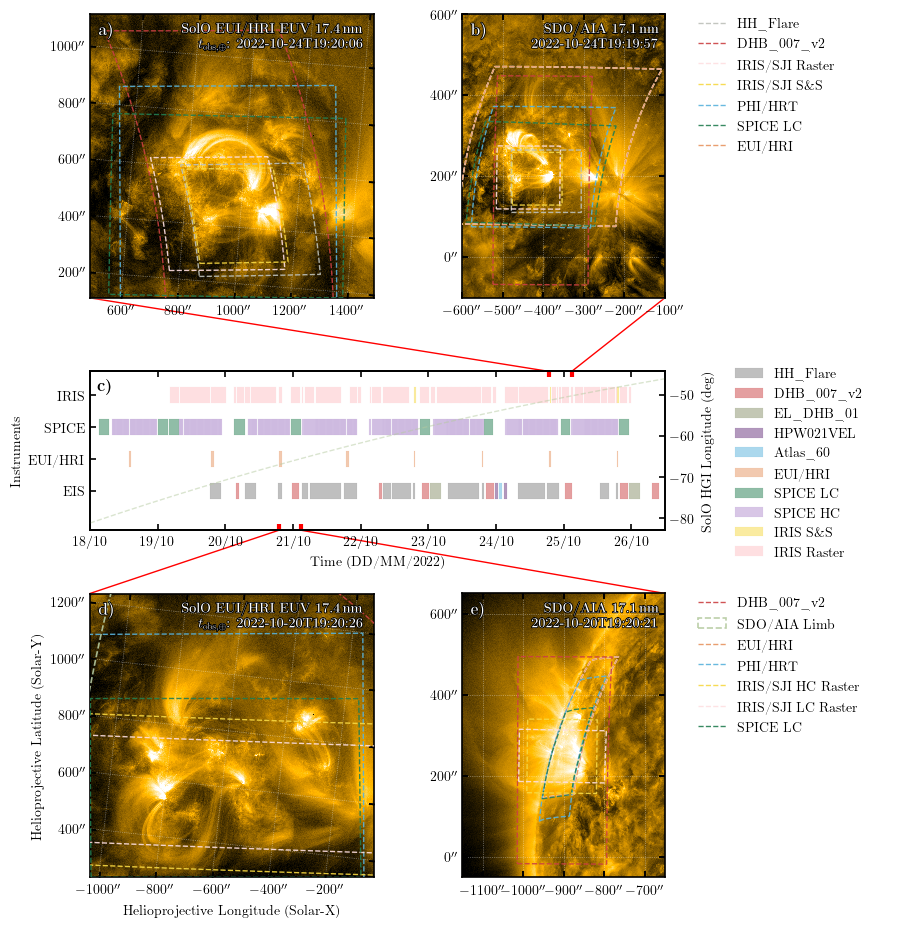

In [123]:

fig = plt.figure(figsize=(10,9.5),constrained_layout=True)

gs1 = gridspec.GridSpec(3,3, figure=fig, height_ratios=[2,1,2],
                        width_ratios=[5,5*5/7,2],
                        hspace=0.01)
#     gs10 = gs1[:2].subgridspec(1,2)
#     gs20 = gs1[2].subgridspec(1,5)
#     gs30 = gs1[3:].subgridspec(1,2)


ax_t = fig.add_subplot(gs1[1,:2])
ax_hgi_lon = ax_t.twinx()
ax_hri_1024 = fig.add_subplot(gs1[0,0], projection=hri_174_map_1024)
ax_hri_1020 = fig.add_subplot(gs1[2,0], projection=hri_174_map_1020)
ax_aia_1024 = fig.add_subplot(gs1[0,1], projection=aia_171_map_1024_crop)
ax_aia_1020 = fig.add_subplot(gs1[2,1], projection=aia_171_map_1020_crop)

hri_174_map_1024.plot(axes=ax_hri_1024, cmap="sdoaia171", title=False,
                        norm=ImageNormalize(vmin=np.nanpercentile(hri_174_map_1024.data, 0.2),
                                                vmax=np.nanpercentile(hri_174_map_1024.data, 99.8),
                                                    stretch=AsinhStretch(0.05)))

text_hri_1024 = ax_hri_1024.text(1.04,0.97, r'\textbf{' + \
                                    r'SolO EUI/HRI EUV 17.4\,nm' + \
                                    r'}' + \
                                    "\n" + \
                                    r'\textbf{' + \
                                    r'$t_{{\mathrm{{obs}},\oplus}}$: {}'.format(hri_174_map_1024.meta['date_ear'][:-4]) + \
                                    r'}',
                                    transform=ax_hri_1024.transAxes, color='white',
                                    fontsize=10, ha='right', va='top',
                                    path_effects=[path_effects.Stroke(linewidth=1.2, foreground='black'),
                                                path_effects.Normal()])


hri_174_map_1020.plot(axes=ax_hri_1020, cmap="sdoaia171", title=False,
                        norm=ImageNormalize(vmin=np.nanpercentile(hri_174_map_1020.data, 0.2),
                                                    vmax=np.nanpercentile(hri_174_map_1020.data, 99.8),
                                                    stretch=AsinhStretch(0.05)))

text_hri_1020 = ax_hri_1020.text(1.04,0.97, r'\textbf{' + \
                                    r'SolO EUI/HRI EUV 17.4\,nm' + \
                                    r'}' + \
                                    "\n" + \
                                    r'\textbf{' + \
                                    r'$t_{{\mathrm{{obs}},\oplus}}$: {}'.format(hri_174_map_1020.meta['date_ear'][:-4]) + \
                                    r'}',
                                    transform=ax_hri_1020.transAxes, color='white',
                                    fontsize=10, ha='right', va='top',
                                    path_effects=[path_effects.Stroke(linewidth=1.2, foreground='black'),
                                                path_effects.Normal()])

aia_171_map_1024_crop.plot(axes=ax_aia_1024, cmap="sdoaia171", title=False,
                                norm=ImageNormalize(vmin=np.nanpercentile(aia_171_map_1024_crop.data, 0.2),
                                                    vmax=np.nanpercentile(aia_171_map_1024_crop.data, 99.8),
                                                    stretch=AsinhStretch(0.05)))

text_aia_1024 = ax_aia_1024.text(1.04,0.97, r'\textbf{' + \
                                    r'SDO/AIA 17.1\,nm' + \
                                    r'}' + \
                                    "\n" + \
                                    r'\textbf{' + \
                                    r'{}'.format(aia_171_map_1024_crop.date.isot[:-4]) + \
                                    r'}',
                                    transform=ax_aia_1024.transAxes, color='white',
                                    fontsize=10, ha='right', va='top',
                                    path_effects=[path_effects.Stroke(linewidth=1.2, foreground='black'),
                                                path_effects.Normal()])

aia_171_map_1020_crop.plot(axes=ax_aia_1020, cmap="sdoaia171", title=False,
                                norm=ImageNormalize(vmin=np.nanpercentile(aia_171_map_1020_crop.data, 0.2),
                                                    vmax=np.nanpercentile(aia_171_map_1020_crop.data, 99.8),
                                                    stretch=AsinhStretch(0.05)))

text_aia_1020 = ax_aia_1020.text(1.04,0.97, r'\textbf{' + \
                                    r'SDO/AIA 17.1\,nm' + \
                                    r'}' + \
                                    "\n" + \
                                    r'\textbf{' + \
                                    r'{}'.format(aia_171_map_1020_crop.date.isot[:-4]) + \
                                    r'}',
                                    transform=ax_aia_1020.transAxes, color='white',
                                    fontsize=10, ha='right', va='top',
                                    path_effects=[path_effects.Stroke(linewidth=1.2, foreground='black'),
                                                path_effects.Normal()])

with propagate_with_solar_surface(rotation_model='rigid'):
    ax_hri_1024_bounds = ax_hri_1024.axis()
    ax_aia_1024_bounds = ax_aia_1024.axis()
    line_eis_hhflare_hri_1024 = ax_hri_1024.plot_coord(get_map_edge_coords(eis_hhflare_195_intmap_shift_1024),
                                            color="#BDC0BA",lw=1,ls="--",alpha=0.9,label=r'HH_Flare')
    line_eis_dhb_1024 = ax_hri_1024.plot_coord(get_map_edge_coords(eis_195_intmap_shift_1024),
                        color="#CB4042",lw=1,ls="--",alpha=0.9,label=r'DHB_007_v2')
    line_iris_raster_1024 = ax_hri_1024.plot_coord(get_map_edge_coords(iris_1400_sji_2322_map_rotate_crop_shift_1024),
                        color="#FEDFE1",lw=1,ls="--",alpha=0.9,label=r'IRIS/SJI Raster')
    line_iris_sas_1024 = ax_hri_1024.plot_coord(get_map_edge_coords(iris_1400_sji_1920_map_rotate_shift_1024),
                        color="#F7D842",lw=1,ls="--",alpha=0.9,label=r'IRIS/SJI S\&S')
    line_phi_1024 = ax_hri_1024.plot_coord(get_map_edge_coords(phi_los_map_1024_shifted),
                        color="#58B2DC",lw=1,ls="--",alpha=0.9,label=r'PHI/HRT')
    line_spice_1024 = ax_hri_1024.plot_coord(get_spice_map_edge_coords(spice_NeVIII_map_rotate_1024),
                        color="#227D51",lw=1,ls="--",alpha=0.9,label=r'SPICE LC')
    
    line_hri_1024 = ax_aia_1024.plot_coord(get_map_edge_coords(hri_174_map_1024),
                        color="#E79460",lw=1,ls="--",alpha=0.9,label=r'EUI/HRI',
                        path_effects=[path_effects.Stroke(linewidth=1.2, foreground='white'),
                                    path_effects.Normal()])
    
    ax_aia_1024.plot_coord(get_map_edge_coords(eis_hhflare_195_intmap_shift_1024),
                        color="#BDC0BA",lw=1,ls="--",alpha=0.9)
    ax_aia_1024.plot_coord(get_map_edge_coords(eis_195_intmap_shift_1024),
                        color="#CB4042",lw=1,ls="--",alpha=0.9)
    ax_aia_1024.plot_coord(get_map_edge_coords(iris_1400_sji_2322_map_rotate_crop_shift_1024),
                        color="#FEDFE1",lw=1,ls="--",alpha=0.9)
    ax_aia_1024.plot_coord(get_map_edge_coords(iris_1400_sji_1920_map_rotate_shift_1024),
                        color="#F7D842",lw=1,ls="--",alpha=0.9)
    ax_aia_1024.plot_coord(get_map_edge_coords(phi_los_map_1024_shifted),
                        color="#58B2DC",lw=1,ls="--",alpha=0.9)
    ax_aia_1024.plot_coord(get_spice_map_edge_coords(spice_NeVIII_map_rotate_1024),
                        color="#227D51",lw=1,ls="--",alpha=0.9)
    
    ax_hri_1024.axis(ax_hri_1024_bounds)
    ax_aia_1024.axis(ax_aia_1024_bounds)

ax_aia_1024_legend_line_list = [line_eis_hhflare_hri_1024[0],line_eis_dhb_1024[0],line_iris_raster_1024[0],line_iris_sas_1024[0],
                    line_phi_1024[0],line_spice_1024[0],line_hri_1024[0]]

ax_aia_1024.legend(ax_aia_1024_legend_line_list, [ln.get_label() for ln in ax_aia_1024_legend_line_list],
    ncol=1,bbox_to_anchor=(1.1,0.1,0.3,0.93), frameon=False)


ax_hri_1020_bounds = ax_hri_1020.axis()
ax_aia_1020_bounds = ax_aia_1020.axis()

with propagate_with_solar_surface(rotation_model='rigid'):
    line_eis_dhb_1020 = ax_hri_1020.plot_coord(get_map_edge_coords(eis_195_intmap_shift_1020),
                        color="#CB4042",lw=1,ls="--",alpha=0.9,label=r'DHB_007_v2')

    line_aia_limb = aia_171_map_1020.draw_limb(axes=ax_hri_1020, color='#B5CAA0', lw=1.2, alpha=0.9, ls='--',
                                               label='SDO/AIA Limb',zorder=2)

    line_hri_1020 = ax_aia_1020.plot_coord(get_map_edge_coords(hri_174_map_1020),
                        color="#E79460",lw=1,ls="--",alpha=0.9,label=r'EUI/HRI',
                        path_effects=[path_effects.Stroke(linewidth=1.2, foreground='white'),
                                    path_effects.Normal()])
    
    line_phi_1020 = ax_hri_1020.plot_coord(get_map_edge_coords(phi_los_map_1020_shifted),
                        color="#58B2DC",lw=1,ls="--",alpha=0.9,label=r'PHI/HRT')
    
    ax_aia_1020.plot_coord(get_map_edge_coords(phi_los_map_1020_shifted),
                        color="#58B2DC",lw=1,ls="--",alpha=0.9)
    
    line_iris_hc_raster = ax_hri_1020.plot_coord(get_map_edge_coords(iris_1400_sji_1920_map_shift_1020),
                        color="#F7D842",lw=1,ls="--",alpha=0.9,label=r'IRIS/SJI HC Raster')
    
    line_iris_lc_raster = ax_hri_1020.plot_coord(get_map_edge_coords(iris_1400_sji_2351_map_shift_1020),
                        color="#FEDFE1",lw=1,ls="--",alpha=0.9,label=r'IRIS/SJI LC Raster')

    line_spice_1020 = ax_hri_1020.plot_coord(get_spice_map_edge_coords(spice_NeVIII_map_rotate_1020),
                        color="#227D51",lw=1,ls="--",alpha=0.9,label=r'SPICE LC')
    
    ax_aia_1020.plot_coord(get_spice_map_edge_coords(spice_NeVIII_map_rotate_1020),
                        color="#227D51",lw=1,ls="--",alpha=0.9)

ax_aia_1020.plot_coord(eis_195_intmap_edge_in_aia,
                        color="#CB4042",lw=1,ls="--",alpha=0.9)

ax_aia_1020.plot_coord(iris_1400_sji_1920_edge_in_aia_1020,
                        color="#F7D842",lw=1,ls="--",alpha=0.9)

ax_aia_1020.plot_coord(iris_1400_sji_2351_edge_in_aia_1020,
                        color="#FEDFE1",lw=1,ls="--",alpha=0.9)

ax_aia_1020_legend_line_list = [line_eis_dhb_1020[0],line_aia_limb[0],line_hri_1020[0],line_phi_1020[0],
                    line_iris_hc_raster[0],line_iris_lc_raster[0],line_spice_1020[0]]

ax_aia_1020.legend(ax_aia_1020_legend_line_list, [ln.get_label() for ln in ax_aia_1020_legend_line_list],
    ncol=1,bbox_to_anchor=(1.1,0.1,0.3,0.93), frameon=False)




ax_hri_1020.axis(ax_hri_1020_bounds)
ax_aia_1020.axis(ax_aia_1020_bounds)



for ax_ in [ax_hri_1024, ax_aia_1024, ax_aia_1020]:
    ax_.set_ylabel(' ')
    ax_.set_xlabel(' ')


color_dict = {"HH_Flare":"grey","DHB_007_v2":"#CB4042",
            "EL_DHB_01":"#89916B","HPW021VEL":"#66327C",
            "Atlas_60":"#58B2DC"}

for ii, row_ in eis_list_df.iterrows():
    ax_t.axvspan(row_["obs_start"], row_["obs_end"], 0.2, 0.3, alpha=0.5, color=color_dict[row_["stud_acr"]],
            label=row_["stud_acr"],linewidth=0.1)
    
for hri_slot in hri_time_slots:
    ax_t.axvspan(hri_slot[0].to_datetime(),
            hri_slot[1].to_datetime(), 0.4, 0.5, alpha=0.5, color="#E79460",label="EUI/HRI",
            linewidth=0.1)
    
for spice_long_ in spice_long_list:
    ax_t.axvspan(spice_long_["Start time"], spice_long_["End time"], 0.6, 0.7, alpha=0.5, color="#227D51",label="SPICE LC",
            linewidth=0.1)
    
for spice_short_ in spice_short_list:
    ax_t.axvspan(spice_short_["Start time"], spice_short_["End time"], 0.6, 0.7, alpha=0.5, color="#B28FCE",label="SPICE HC",
            linewidth=0.1)
    
for iris_time_intervals_sas_ in iris_time_intervals_sas:
    ax_t.axvspan(iris_time_intervals_sas_[0].to_datetime(), iris_time_intervals_sas_[1].to_datetime(), 0.8, 0.9, alpha=0.5, color="#F7D842",label=r"IRIS S\&S",
            linewidth=0.1)

for iris_time_intervals_raster_ in iris_time_intervals_raster:
    ax_t.axvspan(iris_time_intervals_raster_[0].to_datetime(), iris_time_intervals_raster_[1].to_datetime(), 0.8, 0.9, alpha=1, color="#FEDFE1",label="IRIS Raster",
            linewidth=0.1)
    
ax_t.set_xlim(Time("2022-10-18").to_datetime(), Time("2022-10-26 12:00").to_datetime())
ax_t.set_ylabel('Instruments')
ax_t.set_xlabel('Time (DD/MM/2022)')

ax_hgi_lon.plot(solar_orbiter_loc.obstime.to_datetime(), solar_orbiter_loc.lon, color='#B5CAA0', lw=1,
                zorder=0, alpha=0.5,ls='--')

ax_hgi_lon.set_ylabel('SolO HGI Longitude (deg)')

# for phi_ in phi_list[0]:
#     ax_t.ax_tvspan(Time(phi_["Start time"]).to_datetime(), Time(phi_["End time"]).to_datetime(), 0.8, 0.9, alpha=0.5, color="#F7D842",label="PHI",
#                )
#     print(phi_["Start time"], phi_["End time"])

# for ii, row_ in eui_list_df.iterrows():
#     ax_t.ax_tvspan(row_["obs_start"], row_["obs_end"], ymin=0.4, ymax_t=0.6, alpha=0.5, color="#E79460",label="EUI")


handles, labels = ax_t.get_legend_handles_labels()
temp_dict = {k:v for k,v in zip(labels,handles)}
ax_t.legend(temp_dict.values(), temp_dict.keys(), loc="upper right", bbox_to_anchor=(1.1,0.1,0.3,1), ncol=1,
        mode="expand", frameon=False)

ax_t.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
ax_t.set_yticks([0.25,0.45,0.65,0.85])
ax_t.set_yticklabels(["EIS","EUI/HRI","SPICE","IRIS"])

time_range_1024 = Time(['2022-10-24T19:00:00','2022-10-25T02:52:00'])
ax_t_top = ax_t.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
fig.canvas.draw_idle()  # let the figure draw first to get the correct tick positions
ax_t_top.set_xticklabels([])
ax_t_top.set_xticks(np.concatenate((ax_t_top.get_xticks(), time_range_1024.plot_date)))


flag_xtick_index = 0
for ii, (ax_t_top_xtickline, ax_t_top_xticklabel) in enumerate(zip(filter(lambda x: (x.get_marker() == 3),
                                                    ax_t_top.get_xticklines()),
                                                    ax_t_top.get_xticklabels())):
    
    if np.isclose(ax_t_top_xtickline.get_xdata()[0],time_range_1024.plot_date,rtol=1e-10).any():
        ax_t_top_xtickline.set_markeredgecolor("red")
        ax_t_top_xtickline.set_markeredgewidth(3)

        if flag_xtick_index == 0:
            connect_patch = patches.ConnectionPatch(xyA=(ax_t_top_xtickline.get_xdata()[0], 1), xyB=(0,0),
                    coordsA="data", coordsB="axes fraction",axesA=ax_t, axesB=ax_hri_1024, color="red",
                    zorder=-1)
            # somehow annotate on axes will break the gridspec and constrained_layout
            # ax_t.annotate('', xy=(ax_t_top_xtickline.get_xdata()[0], 1), xytext=(0, 0),
            # xycoords=ax_t_top.transData, textcoords=ax_hri_1024.transAxes,
            # arrowprops=dict(facecolor="red", edgecolor="red", arrowstyle='-', shrinkA=0, shrinkB=0,alpha=0.5,zorder=5,
            # lw=1.5))
            flag_xtick_index += 1
        else:
            connect_patch = patches.ConnectionPatch(xyA=(ax_t_top_xtickline.get_xdata()[0], 1), xyB=(1,0),
                    coordsA="data", coordsB="axes fraction",axesA=ax_t, axesB=ax_aia_1024, color="red",
                    zorder=-1)
        
        fig.add_artist(connect_patch)

time_range_1020 = Time(['2022-10-20T19:00:00','2022-10-21T03:00:00'])
ax_t_bottom = ax_t.secondary_xaxis('bottom', functions=(lambda x: x, lambda x: x))
ax_t_bottom.set_xticks(time_range_1020.plot_date)
ax_t_bottom.set_xticklabels([])
fig.canvas.draw_idle()  # let the figure draw first to get the correct tick positions

flag_xtick_index = 0
for ii, (ax_t_bottom_xtickline, ax_t_bottom_xticklabel) in enumerate(zip(filter(lambda x: (x.get_marker() == 2),
                                                    ax_t_bottom.get_xticklines()),
                                                    ax_t_bottom.get_xticklabels())):
    
    ax_t_bottom_xtickline.set_markeredgecolor("red")
    ax_t_bottom_xtickline.set_markeredgewidth(3)
    ax_t_bottom_xticklabel.set_visible(False)

    if ii == 0:
        connect_patch = patches.ConnectionPatch(xyA=(ax_t_bottom_xtickline.get_xdata()[0], 0), xyB=(0,1),
                coordsA="data", coordsB="axes fraction",axesA=ax_t, axesB=ax_hri_1020, color="red",
                zorder=-1)
    else:
        connect_patch = patches.ConnectionPatch(xyA=(ax_t_bottom_xtickline.get_xdata()[0], 0), xyB=(1,1),
                coordsA="data", coordsB="axes fraction",axesA=ax_t, axesB=ax_aia_1020, color="red",
                zorder=-1)
    
    fig.add_artist(connect_patch)

ax_hri_1024.text(0.03,0.97,r'\textbf{a)}',color='white',transform=ax_hri_1024.transAxes,fontsize=12,
                path_effects=[path_effects.Stroke(linewidth=1.2, foreground='black'),
                            path_effects.Normal()],ha='left',va='top')

ax_aia_1024.text(0.03*7/5,0.97,r'\textbf{b)}',color='white',transform=ax_aia_1024.transAxes,fontsize=12,
                path_effects=[path_effects.Stroke(linewidth=1.2, foreground='black'),
                            path_effects.Normal()],ha='left',va='top')

ax_t.text(0.03*5/12,0.96,r'\textbf{c)}',color='black', transform=ax_t.transAxes,fontsize=12,
                ha='left',va='top')

ax_hri_1020.text(0.03,0.97,r'\textbf{d)}',color='white',transform=ax_hri_1020.transAxes,fontsize=12,
                path_effects=[path_effects.Stroke(linewidth=1.2, foreground='black'),
                            path_effects.Normal()],ha='left',va='top')

ax_aia_1020.text(0.03*7/5,0.97,r'\textbf{e)}',color='white',transform=ax_aia_1020.transAxes,fontsize=12,
                path_effects=[path_effects.Stroke(linewidth=1.2, foreground='black'),
                            path_effects.Normal()],ha='left',va='top')


plt.savefig('../../figs/ms_eis_eui_upflow/fov_summary.pdf', bbox_inches='tight', dpi=300)

# plt.show() # Some how I need to add this line to make the jupyter notebook preview has the correct font 